# LA Crime Analysis

In [50]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt

In [51]:
crime_file = 'data/crime-data-from-2010-to-present.csv'
crime_data = pd.read_csv(crime_file)

In [52]:
crime_data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,102005556,2010-01-25T00:00:00,2010-01-22T00:00:00,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"{'latitude': '34.0454', 'needs_recoding': Fals..."
1,101822289,2010-11-11T00:00:00,2010-11-10T00:00:00,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"{'latitude': '33.9572', 'needs_recoding': Fals..."
2,101105609,2010-01-28T00:00:00,2010-01-27T00:00:00,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"{'latitude': '34.1211', 'needs_recoding': Fals..."
3,101620051,2010-11-11T00:00:00,2010-11-07T00:00:00,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"{'latitude': '34.241', 'needs_recoding': False..."
4,101910498,2010-04-07T00:00:00,2010-04-07T00:00:00,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"{'latitude': '34.3147', 'needs_recoding': Fals..."


In [31]:
print(f'There are {crime_data.shape[0]} data points and {crime_data.shape[1]} features.')
print('Features:')
for i, feature in enumerate(crime_data.columns.values):
    print(f'{i}: {feature}')
crime_data.describe()

There are 1993259 data points and 26 features.
Features:
0: DR Number
1: Date Reported
2: Date Occurred
3: Time Occurred
4: Area ID
5: Area Name
6: Reporting District
7: Crime Code
8: Crime Code Description
9: MO Codes
10: Victim Age
11: Victim Sex
12: Victim Descent
13: Premise Code
14: Premise Description
15: Weapon Used Code
16: Weapon Description
17: Status Code
18: Status Description
19: Crime Code 1
20: Crime Code 2
21: Crime Code 3
22: Crime Code 4
23: Address
24: Cross Street
25: Location 


,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Code,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4
count,1.993259e+06,1.993259e+06,1.993259e+06,1.993259e+06,1.993259e+06,1.993259e+06,1.993209e+06,667618.000000,1.993250e+06,130161.000000,3235.000000,96.000000
mean,1.452681e+08,1.361522e+03,1.110423e+01,1.156819e+03,5.069209e+02,3.178082e+01,3.111638e+02,371.145126,5.067552e+02,950.934166,971.498300,974.218750
std,2.759142e+07,6.467373e+02,6.007329e+00,6.007339e+02,2.104709e+02,2.060810e+01,2.110329e+02,113.643154,2.103421e+02,125.442245,87.084159,84.043623
min,2.100000e+02,1.000000e+00,1.000000e+00,1.000000e+02,1.100000e+02,-9.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,93.000000,421.000000
25%,1.212041e+08,9.300000e+02,6.000000e+00,6.440000e+02,3.300000e+02,2.000000e+01,1.020000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000
50%,1.502066e+08,1.430000e+03,1.200000e+01,1.203000e+03,4.410000e+02,3.200000e+01,2.100000e+02,400.000000,4.410000e+02,998.000000,998.000000,998.000000
75%,1.707102e+08,1.900000e+03,1.600000e+01,1.672000e+03,6.260000e+02,4.600000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.000000
max,9.102204e+08,2.359000e+03,2.100000e+01,2.199000e+03,9.560000e+02,1.180000e+02,9.710000e+02,516.000000,9.990000e+02,999.000000,999.000000,999.000000


# LA Arrest Analysis

In [ ]:
arrest_file = 'data/arrest-data-from-2010-to-present.csv'
arrest_data = pd.read_csv(arrest_file)

<IPython.core.display.Javascript object>


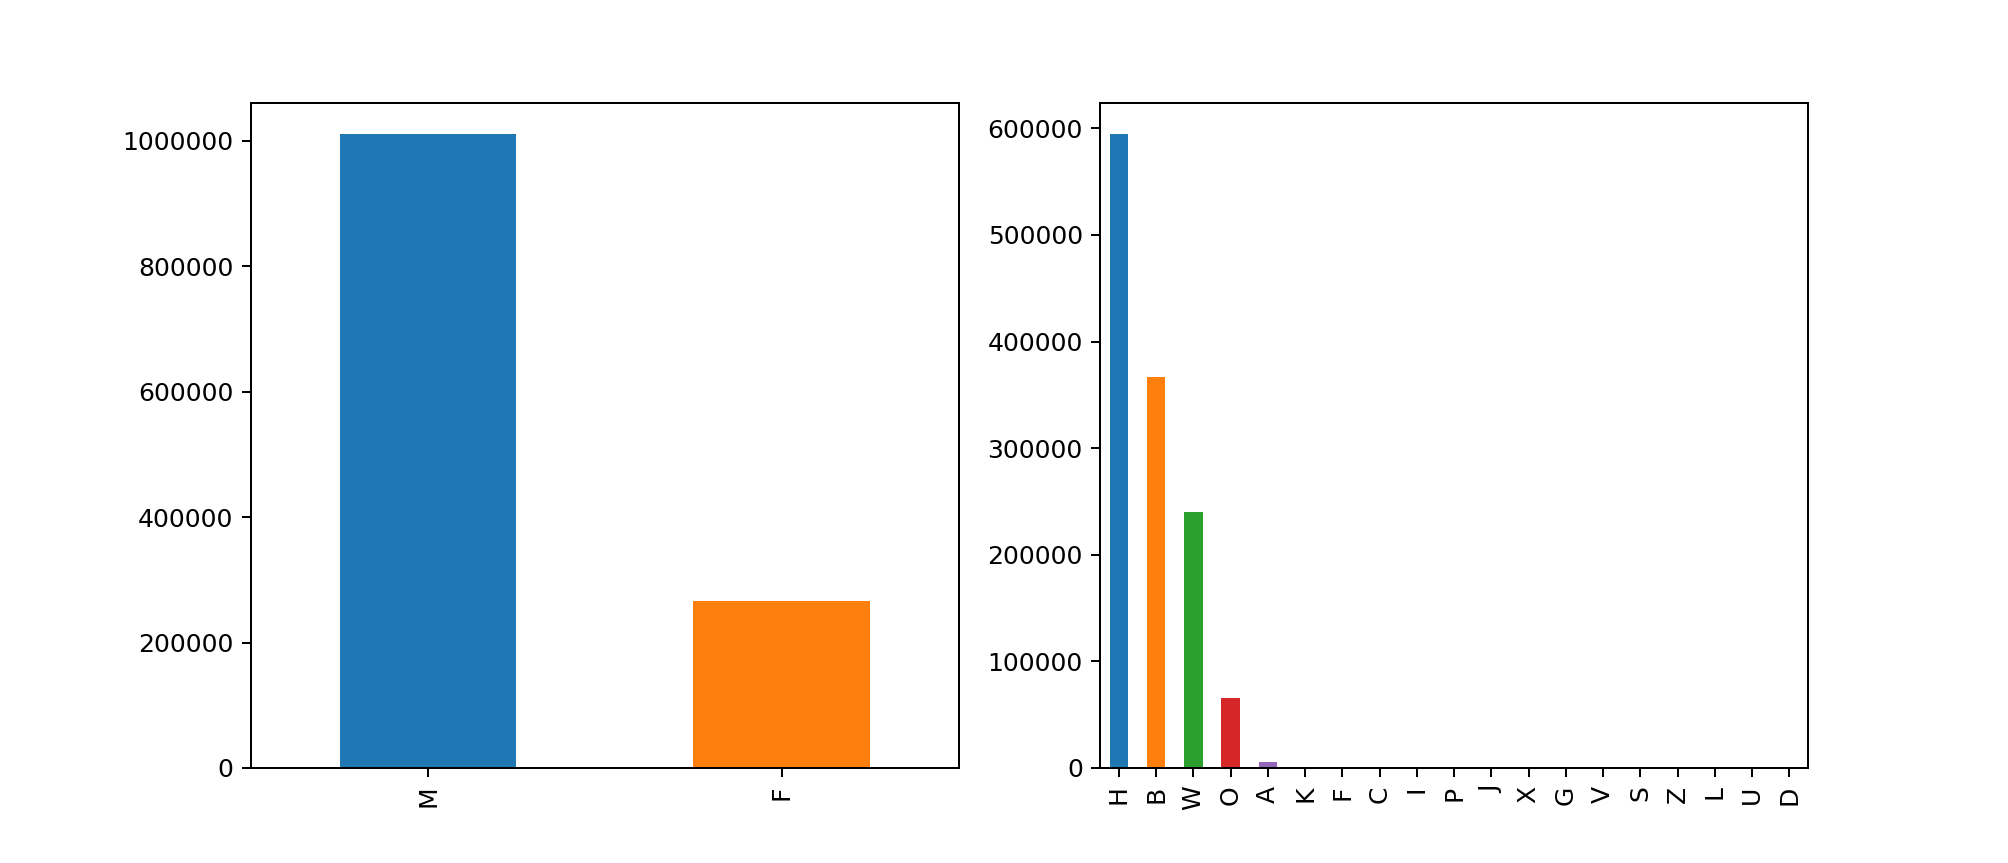

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2)
arrest_data['Sex Code'].value_counts().plot(kind='bar', ax=ax1)
arrest_data['Descent Code'].value_counts().plot(kind='bar', ax=ax2)
plt.show()